# Assignment 4
# Part I: K-means Segmentation
## (60% weight of the assignment)

NOTE: Three of the theoretical problems below are optional for undergrads. Note that the "theoretical" problems are independent of the programming part (problem 4).

## Problem 0 (<i>probability simplex</i> and distribution <i>entropy</i>)
### The general concept of "entropy" is very important in science (statistics, physics, computer vision, ML, AI, information threory, data analysis, etc). The general formula for the entropy is $$H({\mathbf S}) = -\sum_k S^k \ln S^k$$ where $${\mathbf S}:= (S^1,...,S^K)\;\;\in \;\;\Delta^K $$ is any distribution over $K$ values (e.g. classes, categories, decisions, etc) and $\Delta^K:= \{p\in{\cal R}^K\;|p^k\geq 0,\;\sum_{k=1}^K p^k=1\}\subset {\cal R}^K$ is a so-called <i>probability simplex</i>. Probably the most basic property of entropy one should know is that it measures "randomness" of a distribution. 

### (part a) 
### In this exercise you should visualize the entropy function $H: \Delta^K \rightarrow {\cal R}^1$ for $K=2$. In this simple case the distribution ${\mathbf S} = (S^1,S^2)$ may correspond to some binary random variable $X$ so that $S^1=Pr(X=1)$ and  $S^2=Pr(X=0)$. For example, $X$ could represent a binary decision about the category of an object observed in an image (person or not-a-person). Since $S^1+S^2=1$, probability simplex $\Delta^2$ has only one degree of freedom - one scalar is enough to represent an arbitrary binary distribution. It is easy to visualize the entropy function over all possible binary distributions ${\mathbf S}=(S^1,S^2)\in\Delta^2 $ as probability simplex  $\Delta^2 = \{(x,1-x)\,|\, 0\leq x\leq 1\}$  is a  line interval inside ${\cal R}^2$.  Visualize the entropy function $H({\mathbf S})$ for $K=2$ as follows. Derive the expression for function $H(x):=H({\mathbf S})$ for ${\mathbf S}=(x,1-x)$ and use $matplotlib$ to plot  $H(x)$ for $x\in[0,1]$ in the code cell below. State which binary distribution(s) ${\mathbf S}=(S^1,S^2)$  have the lowest and the largest entropy values. Informally relate your observations to "randomness" of these distributions. 

<img src="images/simplex2.png" width="300" height="300">

### Solution: 

The formula for the entropy of a distribution $S=\{S^1, S^2, ... , S^k \}$ is given by:
$$H(S) = - \sum_k S^k \ln(S^k)$$
For the distribution $S=(x, x-1)$, we get:
$$
\begin{align*}
    H(S) = -((x \ln(x))+((1-x) \ln(1-x)))
\end{align*}
$$

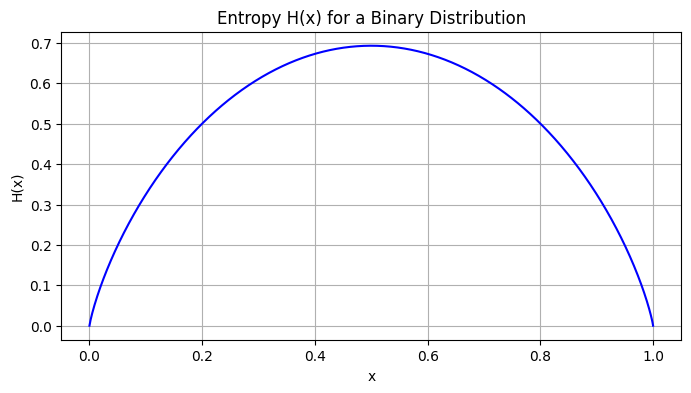

Minimum Entropy: -1.000000082690371e-10
Maximum Entropy: 0.6931466793583596


In [1]:
# Write code generating 2D plot of the entropy H(x) for x in [0,1]
# HINT: you might need to be carefull with potential numerical issues at x=0 and x=1, 
# but often it works fine without doing anything special.
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# the entropy function of a binary distribution
def entropy(x):
    # add small epsilon to avoid log(0)
    return -x * np.log(x + 1e-10) - (1 - x) * np.log(1 - x + 1e-10)

# generate sampling points and build entropy distribution
x_values = np.linspace(0, 1, 1000)
entropy_values = entropy(x_values)

# plot
plt.figure(figsize=(8, 4))
plt.plot(x_values, entropy_values, color='blue')
plt.title("Entropy H(x) for a Binary Distribution")
plt.xlabel("x")
plt.ylabel("H(x)")
plt.grid(True)
plt.show()

# find minimum and maximum entropy values
min_entropy = np.min(entropy_values)
max_entropy = np.max(entropy_values)
print(f"Minimum Entropy: {min_entropy}")
print(f"Maximum Entropy: {max_entropy}")


### The lowest entropy value is 0 (error above caused by small epsilon used to avoid $\log(0)$) and it corresponds to $S=(1,0)$ and $S=(0,1)$. 

This makes sense, as thse systems have 1 result and therefore 0 randomness/entropy.

### The largest entropy value is approximately 0.693 and it corresponds to $S=(0.5,0.5)$.

This makese sense as a system with equal probabilities of both outcomes would have the most randomness/entropy.

### (part b) 

### In the previous part you saw a visulaization of the probability simplex $\Delta^2$ as a subset of ${\cal R}^2$. Using any picture editor (e.g. "paint"), edit file $images/simplex3.png$ (shown below) to draw your best impression of the probability simplex $\Delta^3 \subset {\cal R}^3$  for distributions ${\mathbf S}=(S^1,S^2,S^3)$ over $K=3$ possible values/classes/categories. Your drawing should visualize simplex $\Delta^3$ as a subset of ${\cal R}^3$. 

<img src="images/simplex3.png" width="500" height="500"> 

### Edited image:

<img src="images/simplex3_edited.png" width="500" height="500"> 

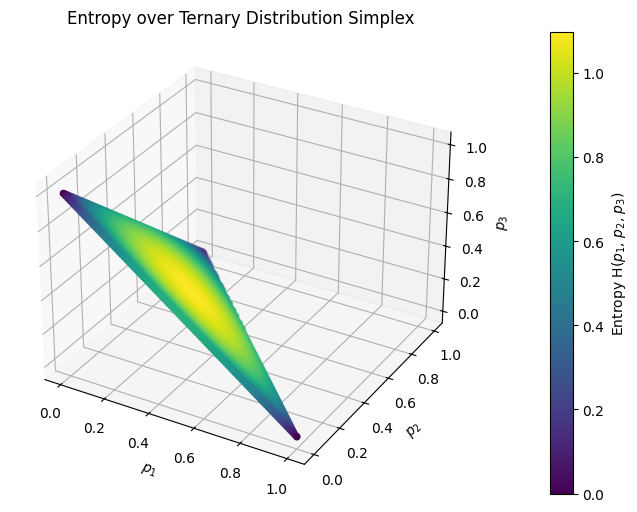

Minimum Entropy: -1.000000082690371e-10
Maximum Entropy: 1.0986122883681098


In [2]:
# BONUS: one can also visualize the entropy function over the probability simplex for K=3. 
# NOTE: There are a number of different ways to do this visualizatin, but it is a bit trickier than what you did in part (a). 
#       Do this bonus excercise only if you have time. 

from mpl_toolkits.mplot3d import Axes3D

# the entropy function of a ternary distribution
def ternary_entropy(p1, p2, p3):
    epsilon = 1e-10  # small epsilon to avoid log(0)
    return -(p1 * np.log(p1 + epsilon) + p2 * np.log(p2 + epsilon) + p3 * np.log(p3 + epsilon))

# generate sampling points
num_points = 100
p1_vals = np.linspace(0, 1, num_points)
p2_vals = np.linspace(0, 1, num_points)
p1, p2 = np.meshgrid(p1_vals, p2_vals)
p3 = 1 - p1 - p2

# clip points outside the simplex (where p1 + p2 > 1)
mask = p3 >= 0
p1, p2, p3 = p1[mask], p2[mask], p3[mask]

# build distribution
entropy_values = ternary_entropy(p1, p2, p3)

# plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(p1, p2, p3, c=entropy_values, cmap='viridis')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$p_3$')
plt.colorbar(sc, label='Entropy H($p_1$, $p_2$, $p_3$)', pad=0.1)
plt.title("Entropy over Ternary Distribution Simplex")
plt.show()

# find minimum and maximum entropy values
min_entropy = np.min(entropy_values)
max_entropy = np.max(entropy_values)
print(f"Minimum Entropy: {min_entropy}")
print(f"Maximum Entropy: {max_entropy}")

## Problem 1 (soft-max)
### Following slide 55 in topic 9A, derive the optimal "soft" clustering (distribution over clusters) at point $p$ $${\mathbf S}_p=\{S_p^k\;|\;1\leq k\leq K,\; S_p^k\geq 0,\; \sum_k S_p^k=1\}$$ that Lloyd's algorithm would obtain when re-estimating segmentation for fixed cluster models parameters $\mu_k$.  Note that the total K-means objective $E({\mathbf S},\mu)$ as a function of segmentation $\mathbf S$ (when $\mu$ is fixed) is a sum of independent terms for every pixel. When computing the optimal distribution ${\mathbf S}_p$ at pixel $p$ it is enough to focus on the terms dependent only on its components $S_p^k$ for $k\in\{1,\dots,K\}$. For the soft or fuzzy K-means formulation on slide 55, these terms are $$\sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p) \quad\quad\quad\quad\quad\quad (*)$$ where each constant $a_p^k:= -\ln P(f_p|\mu_k)$  (assuming fixed  $\mu$) corresponds to $k$-th cluster log-likelihood at the observed feature point $f_p$, constant $T$ represents the "temperature" parameter, and $H({\mathbf S}_p):=-\sum_k S_p^k \ln S_p^k$ is the entropy of ${\mathbf S}_p$. As indicated by "$\ln$", we use the natural log function (base $e$) both for log-likelihoods and the entropy function.
### Use your solution to show what happens with the optimal distribution $S_p$ when the temperature parameter reduces to zero $T\longrightarrow 0$.
### HINT 1: Optimization of $(*)$ should be done over variable ${\mathbf S}_p$ representing a probability distribution. Thus, constraint $\sum_k S_p^k=1$ should be respected.  You should use the standard general <a href="https://en.wikipedia.org/wiki/Lagrange_multiplier#:~:text=In%20mathematical%20optimization%2C%20the%20method,chosen%20values%20of%20the%20variables).">Lagrangian approach</a> that converts constrained optimization into unconstrained one. In particular, you can combine objective function $(*)$ with the constraint $\sum_k S_p^k=1$ into the <i>Lagrangian</i>: $$L({\mathbf S}_p,\lambda) \;=\; \sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p)\; +\;\lambda \left(\sum_{k=1}^K S_p^k - 1\right) \quad\quad\quad\quad (**)$$ that includes one extra optimization variable $\lambda$, the so called <i>Lagrange multiplier</i>.  The solution ${\mathbf S}_p$  for the original constrained optimization problem follows directly from the solution $\{{\mathbf S}_p, \lambda \}$ that minimizes the Lagrangian.
### HINT 2: Similarly to optimization of single-variate functions, you can find extrema points for the multi-variate Lagrangian $(**)$ by finding values of variables $(S_p^1,\dots,S_p^K,\lambda)$ where its derivative (gradient) equals zero.  That is, the whole problem boils down to solving the system of $K+1$ equations $\nabla L = {\mathbf 0}$ for the Lagrangian in $(**)$.
### HINT 3: This exercise aims to see how adding the entropy affects a linear loss. Optimization of $(*)$ over distributions ${\mathbf S}_p$ should result in the, so-called, <font color="red">soft-max operator</font> applicable to arbitrary $K$ potentials $\{a_p^k\,|\,1\leq k\leq K\}$.

____________________

#### Solution:

To find the optimal "soft" clustering distribution ${\mathbf S}_p$ at a point $p$, we can minimize the Lagrangian defined by combining the given objective function and constraint:
$$
L({\mathbf S}_p, \lambda) = \sum_{k=1}^K S_p^k a_p^k - T \sum_{k=1}^K S_p^k \ln S_p^k + \lambda \left(\sum_{k=1}^K S_p^k - 1\right)
$$

To find the minimum, we first take the partial derivative with respect to each $S_p^k$ and set them equal to zero:
$$
\frac{\partial L}{\partial S_p^k} = a_p^k - T(\ln S_p^k + 1) + \lambda = 0
$$

Rearranging for $\ln S_p^k$, we get:
$$
\begin{align*}
    \ln S_p^k & = \frac{\lambda - a_p^k}{T} - 1 \\
    \iff \quad \quad S_p^k & = \exp\left(\frac{\lambda - a_p^k}{T} - 1\right) 
\end{align*}
$$
Since the constraint defines that $\sum_k S_p^k=1$, it follows that:
$$
\begin{align*}
    1 & = \sum_{k=1}^K \exp\left(\frac{\lambda - a_p^k}{T} - 1\right) \\
    1 & = \sum_{k=1}^K \exp\left(\frac{- a_p^k}{T}\right) \cdot \exp\left(\frac{\lambda}{T} - 1\right) \\
    \iff \quad \quad 
    \exp\left(\frac{\lambda}{T} - 1\right) & = \frac{1}{\sum_{k=1}^K \exp\left(\frac{- a_p^k}{T}\right)}
\end{align*}
$$

Substituting this expression back into the expression for $S_p^k$:
$$
\begin{align*}
    S_p^k 
    & = \exp\left( \frac{- a_p^k}{T} \right) \cdot \exp\left(\frac{\lambda}{T} - 1\right) \\
    & = \exp\left( \frac{- a_p^k}{T} \right) \cdot \frac{1}{\sum_{k=1}^K \exp\left(\frac{- a_p^k}{T}\right)}
\end{align*}
$$

Thus, we obtain the soft-max distribution for each cluster $S_p^k$ at point $p$ as:
$$
\boxed{
    S_p^k = \frac{\exp\left( \frac{- a_p^k}{T} \right)}{\sum_{j=1}^K \exp\left( \frac{- a_p^j}{T} \right)}
}
$$

As $T \rightarrow 0$,  the exponentials in the soft-max function will amplify the largest term in $\{-a_p^k\}$ (i.e., the smallest value of $a_p^k$). Specifically, if there is a cluster $k'$ for which $a_p^{k'}$ is the minimum among $\{a_p^k\}$ (meaning $a_p^{k'} < a_p^k$ for all $k \neq k'$), then $\frac{- a_p^{k'}}{T}$ will be the largest in magnitude and thus the term $\exp\left( \frac{- a_p^{k'}}{T} \right)$ will approach infinity faster than the others. Thus, as $T \rightarrow 0$:

$$
S_p^{k'} \approx 1, \quad \text{and} \quad S_p^k \approx 0 \quad \text{for all } k \neq k'
$$

This demonstrates how the temperature parameter $T$ controls the **softness** of the clustering assignments. As $T$ gets closer to 0, the distribution $S_p$ converges on traditional **hard** K-means clustering, assigning full weight to one cluster only.


____________________

## Problem 2 (Mahalanobis distance, decorrelation, etc.) - required for grad students, optional for undergrads (BONUS)
### Let $X\in R^N$ be a Gaussian random vector with given mean $\mu$ and covariance matrix $\Sigma$. Find $N\times N$ matrix $A$ such that linear transformation $Y=AX$ gives a random vector $Y$ with covariance $\Sigma_Y={\mathbf I}$. That is, the components of the transformed  random vector $Y$ should be i.i.d. You should derive an equation for matrix $A$ assuming as given eigen-decomposition of the covariance matrix $\Sigma=U\Lambda U^T$ where $Λ=diag(s_1,…,s_n)$ is a diagonal matrix of (non-negative!) eigen-values and $U$ is an orthogonal $N\times N$ matrix (its columns are unit eigen-vectors of $\Sigma$).
### HINT: you should solve the following (equivalent) simple geometric problem on "linear warps" (linear domain transforms): find a linear transformation $A$ of points in $R^N$ such that Mahalanobis distances (slide 59, topic 9A) between any two given vectors $X,\mu\in R^N$ are equivalent to Euclidean distances between the corresponding vectors $Y=AX$ and $m=A\mu$ in the transformed space, that is, $$\|X-\mu\|^2_\Sigma \;\;=\;\; \|Y-m\|^2.$$  The proof should be simple (just a couple of lines) if you use linear algebraic expressions for two squared metrics above and the given eigen decomposition of matrix $\Sigma$.
### INTERPRETATION 1: reading the geometric result in revese shows that linear transformation "distort" Euclidean distances into Mahalanobis distances.
### INTERPRETATION 2 (Euclidean embedding): a space with Mahalanobis metric can be isometrically embedded in a Euclidean space. This is a trivial spacial case of the <font color="red">Nash theorem</font> on existence of Euclidean embeddings of more general (Riemannian) metric spaces.

____________________

#### Solution:

We wish to find a transformation $A$ such that the transformed vector $Y=AX$ has a covariance of $\mathbf{I}$. 

We know the covariance matrix of $Y = AX$ is given by:
$$
\begin{align*}
   \Sigma_Y 
   & = \mathbb{E}\left[(Y - \mathbb{E}[Y])(Y - \mathbb{E}[Y])^T\right] \\
   & = A \Sigma A^T
\end{align*}
$$
We use the eigen-decomposition of the covariance matrix $\Sigma = U \Lambda U^T$. Since we want $\Sigma_Y = \mathbf{I}$, we need to find $A$ such that:
$$
\begin{align*}
   A \Sigma A^T & = \mathbf{I} \\
   \iff \quad 
   A (U \Lambda U^T) A^T & = \mathbf{I}
\end{align*}
$$

Now, consider $A = U \Lambda^{-1/2} U^T$, where $\Lambda^{-1/2} = \text{diag}(s_1^{-1/2}, \ldots, s_n^{-1/2})$. Substituting $A = U \Lambda^{-1/2} U^T$ into $A \Sigma A^T$:
$$
\begin{align*}
   A \Sigma A^T 
   & = (U \Lambda^{-1/2} U^T)(U \Lambda U^T)(U \Lambda^{-1/2} U^T)^T \\
   & = U \Lambda^{-1/2} \Lambda U^T (U^T)^T \Lambda^{-1/2} U^T \\
   & = U \Lambda^{-1/2} (\Lambda^{1/2} \Lambda^{1/2}) \Lambda^{-1/2} U^T \\
   & = U U^T \\
   & = I
\end{align*}
$$

Thus, the matrix $A = U \Lambda^{-1/2} U^T$ is the required transformation to produce a random vector $Y = AX$ with covariance $\Sigma_Y = \mathbf{I}$.

We know that the Mahalanobis distance between any two vectors $X, \mu \in \mathbb{R}^n$ with covariance $\Sigma$ is defined by:
$$d_M (X, \Sigma)^2 = (X - \mu)^T \Sigma^{-1} (X - \mu)$$

With the defined transformation, since the covariance matrix is $I$, this distance is equivalent to the Euclidean distance in the transformed $Y$-space:
$$\|Y - m\|^2 = (Y - m)^T (Y - m)$$
where $Y = AX$ and $m = A\mu$.

____________________

## Problem 3
### Show algebraic equivalence between two non-parametric formulations for K-means (objectives $E(S)$ at the bottom of slide 74, Topic 9A):
### $$  \sum_{k=1}^K \frac{\sum_{pq\in S^k}\|f_p-f_q\|^2}{2\;|S^k|} \;\;=\;\; const - \sum_{k=1}^K \frac{\sum_{pq\in S^k} \langle f_p,f_q\rangle}{|S^k|}$$
#### Note: here the summation over $pq\in S^k$ is an abbreviated notation for double summation over all $p\in S^k$ and all $q\in S^k$.

____________________

#### Solution:

The squared norm term can be expanded using the identity:
$$ \|f_p - f_q\|^2 = \|f_p\|^2 + \|f_q\|^2 - 2 \langle f_p, f_q \rangle $$

Thus, we have:
$$
\begin{align*}
   \sum_{k=1}^K \frac{\sum_{pq\in S^k} \|f_p - f_q\|^2}{2\;|S^k|} 
   & = \sum_{k=1}^K \frac{\sum_{pq\in S^k} \left( \|f_p\|^2 + \|f_q\|^2 - 2 \langle f_p, f_q \rangle \right)}{2\;|S^k|} \\
   & = \sum_{k=1}^K \frac{\sum_{pq\in S^k} \|f_p\|^2 + \|f_q\|^2}{2\;|S^k|} - \sum_{k=1}^K \frac{\sum_{pq\in S^k} \langle f_p, f_q \rangle}{|S^k|}
\end{align*} 
$$

Since the sum $\sum_{pq\in S^k} \|f_p\|^2$ adds a term for each $q \in S^k$ but does not depend on $q$:
$$\sum_{pq\in S^k} \|f_p\|^2 = |S^k| \sum_{p\in S^k} \|f_p\|^2$$
Similarly for $\sum_{pq\in S^k} \|f_q\|^2$, which does not depend on $p$:
$$\sum_{pq\in S^k} \|f_q\|^2 = |S^k| \sum_{q\in S^k} \|f_q\|^2$$
And since $p$ and $q$ are symmetric over $S^k$, the two expression above are the same. It follows that:
$$
\begin{align*}
   \sum_{k=1}^K \frac{\sum_{pq\in S^k} \|f_p - f_q\|^2}{2\;|S^k|} 
   & = \sum_{k=1}^K \frac{ 2 |S^k| \sum_{q\in S^k} \|f_q\|^2}{2\;|S^k|} - \sum_{k=1}^K \frac{\sum_{pq\in S^k} \langle f_p, f_q \rangle}{|S^k|} \\
   & = \sum_{k=1}^K \sum_{q\in S^k} \|f_q\|^2 - \sum_{k=1}^K \frac{\sum_{pq\in S^k} \langle f_p, f_q \rangle}{|S^k|} 
\end{align*}
$$
Since the term $\sum_{k=1}^K \sum_{q \in S^k} \|f_q\|^2$ represents the sum of squared norms of all feature vectors $f_q$, it is independent of the specific clustering assignments (i.e., it depends only on the data points themselves and not on how they are partitioned into clusters $S^k$). This means that 

$$ \sum_{k=1}^K \sum_{q \in S^k} \|f_q\|^2 = const $$

This completes the proof that:

$$ \sum_{k=1}^K \frac{\sum_{pq\in S^k} \|f_p - f_q\|^2}{2\;|S^k|} = const - \sum_{k=1}^K \frac{\sum_{pq\in S^k} \langle f_p, f_q \rangle}{|S^k|} $$


____________________

## Problem 4 - (a simple finite-dimensional version of Mercer theorem) - required for grad students, optional for undergrads (BONUS)
### Let $A$ be an $n\times n$ positive semi-definite matrix defining pairwise affinities between $n$ ponts. Find a closed-form expression for $n$ vectors $\phi_i$  (a so-called "Euclidean embedding") such that their Euclidean dot products agree with the given affinites, i.e. $\langle \phi_i,\phi_j\rangle = A_{ij}$ for all $1\leq i,j\leq n$. You can assume known eigen-decomposition $A=Q\Lambda Q^T$ where $Λ=diag(λ_1,…,λ_n)$ is a diagonal matrix of (non-negative!) eigen-values and $Q$ is an orthogonal $n\times n$ matrix whose columns $Q_i$ are unit eigen-vectors of $A$.

____________________

#### Solution:

For the positive semi-definite matrix $A$, we have the eigen-decomposition $A = Q \Lambda Q^T$. By this decomposition, consider the embedding vectors $\phi_i$ as the columns of the matrix $\Phi$, where:
$$
   \Phi = Q \Lambda^{1/2}
$$
Here, $\Lambda^{1/2}$ is the diagonal matrix with entries $\sqrt{\lambda_1}, \sqrt{\lambda_2}, \dots, \sqrt{\lambda_n}$ on its diagonal.

By the embedding equation, we know we can obtain the Gram matrix (ie., the inner/dot product matrix) using:
$$
\begin{align*}
   \Phi \Phi^T 
   & = Q \Lambda^{1/2} (Q \Lambda^{1/2})^T \\
   & = Q \Lambda^{1/2} \Lambda^{1/2} Q^T \\
   & = Q \Lambda Q^T \\
   & = A
\end{align*}
$$

By the properties of the Gram matrix, if $\phi_i$ is the $i^{\text{th}}$ column vector of $\Phi$, the dot product $\langle \phi_i, \phi_j \rangle$ between the embedding vectors satisfies:
$$
   \langle \phi_i, \phi_j \rangle = A_{ij}
$$

This shows that in this embedding, the dot product $\langle \phi_i, \phi_j \rangle$ between any two vectors $\phi_i$ and $\phi_j$ corresponds to the affinity matrix entries $A_{ij}$, as required

____________________

## Problem 5 - (approximate low-dimenstional Euclidean embedding) - required for grad students, optional for undergrads (BONUS)
### Assume that $\tilde{A}$ is a low-rank approximation of matrix $A$ in problem 4 of given rank $m<n$. That is, $\tilde{A} = Q\Lambda_m Q^T$ where $\Lambda_m=diag(\lambda_1,\dots,\lambda_m,0,\dots,0)$ is a diagonal matrix of the largest $m$ eigen values of $A$ (a la Eckart–Young–Mirsky theorem, Topic 8). Using your solution for problem 4, specify a formula for "Euclidean embedding" $\{\tilde{\phi}_i\}$ such that $\langle \tilde{\phi}_i,\tilde{\phi}_j\rangle = \tilde{A}_{ij}$ and show that  $\tilde{\phi}_i \in {\cal R}^m$.
#### Comment: basic K-means (Lloyd's algorithm) over such points $\{\tilde{\phi}_i\}$ can be used as an approximate algorithm for kernel clusterng (e.g. for average association criteria). This approach is an example of "spectral clustering", which uses eigen decomposition of the affinity matrix $A$.

____________________

#### Solution:

For the low-rank approximation $\tilde{A}$ of $A$, we have the eigen-decomposition $\tilde{A} = Q \Lambda_m Q^T$, involving only the largest $m$ eigenvalues. By this decomposition, consider the embedding vectors $\tilde{\phi}_i$ as the columns of the matrix $\Phi$, where: 
$$
\tilde{\Phi} = Q \Lambda_m^{1/2}
$$
Here, $\Lambda_m^{1/2}$ is the diagonal matrix with entries $\sqrt{\lambda_1}, \sqrt{\lambda_2}, \dots, \sqrt{\lambda_m}$ on its diagonal.

By the embedding equation, we know we can obtain the Gram matrix (ie., the inner/dot product matrix) using:
$$
\begin{align*}
\tilde{\Phi} \tilde{\Phi}^T &= Q \Lambda_m^{1/2} (Q \Lambda_m^{1/2})^T \\
&= Q \Lambda_m^{1/2} \Lambda_m^{1/2} Q^T \\
&= Q \Lambda_m Q^T \\
&= \tilde{A}
\end{align*}
$$

By the properties of the Gram matrix, the dot product between the embedding vectors $\tilde{\phi}_i$ satisfies:
$$
\langle \tilde{\phi}_i, \tilde{\phi}_j \rangle = \tilde{A}_{ij}
$$

The embedding matrix $\tilde{\Phi} = Q \Lambda_m^{1/2}$ involves $\textbf{only}$ the top $m$ eigenvalues of $A$, and the rest of the columns are 0. This means the embedding matrix has $m$ linearly independent columns, and outputs $\tilde{\phi}_i$ will be in $\mathbb{R}^n$.

Therefore we have shown that the embedding $\tilde{\Phi} = Q \Lambda_m^{1/2}$ satisfies $\langle \tilde{\phi}_i,\tilde{\phi}_j\rangle = \tilde{A}_{ij}$ and $\tilde{\phi}_i \in {\cal R}^m$.

____________________

## Problem 4 (K-means). 
### Subproblem 4.1 
### Implement K-means (Lloyd's algorithm) for clustering pixel features. Most of the work is already done for you, but you do get a chance to play with numpy and evaluate the empirical properties of K-means. Note that your implementation will be super slow if you use double-loops to traverse image pixels to compute errors and means. To avoid deductions for such double-loops, you should learn how to use functions like $np.where$, $np.minimum$, $np.square$, $np.ogrid$, or other numpy functions allowing to avoid multi-loops over matrix (image) elements (pixels).
#### The provided code below only computes random pixel segments. You need to write code producing correct clusters and correct "means". To achieve this you only need to complete the implementation of functions $compute\_means$ and $compute\_labels$ inside "MyKmenasApp" corresponding to the two iterative steps in Lloyd's algorithm (as in "compute_k_means_clusters"). 
#### Your implementation of the main two steps of K-means algorithm should use RGBXY features. Following slide 49 in topic 9A, the relative contribution of "squared errors" from XY features must be set by parameter "weightXY" (or self.w inside MyKmeansApp), so that the squared error between RGBXY feature $F_p=[R_p,G_p,B_p,X_p,Y_p]$ at any pixel $p$ and any given cluster mean $m=[R_m,G_m,B_m,X_m,Y_m]$ is 
#### $$||F_p - m||^2 = (R_p - R_m)^2 + (G_p - G_m)^2 + (B_p - B_m)^2 + w \cdot (X_p-X_m)^2 + w \cdot (Y_p-Y_m)^2.$$
#### Fully implemented "KmeansPresenter" visualizes the segmentation results (cluster labels mask) where each cluster is highlighted either by some  random color (press r-key) or by the "mean" segment color (press m-key). All keys that "KmeansPresenter" responds to are as follows: 

1. press 'i'-key for each (i)teration of K-means 
2. press 'c'-key to run K-means to (c)onvergence (when energy improvement is less than given threshold)
3. press 'v'-key to run K-means to convergence with (v)isualization of each iteration
4. press 'r'-key to start over from (r)andom means
5. press 's'-key to change to a random (s)olid color-palette for displaying clusters
6. press 't'-key to change to a random (t)ransparent palette for displaying clusters
7. press 'm'-key to change to the (m)ean-color palette for displaying clusters

In [3]:
# loading standard modules
import math

# interactive mode
%matplotlib widget

# loading custom module (requires file asg1.py in the same directory as the notebook file)
from asg1_error_handling import Figure, KmeansPresenter

In [4]:
class MyKmeansApp:

    def __init__(self, img, num_clusters=2, weightXY=1.0):
        self.k = num_clusters
        self.w = weightXY
        self.iteration = 0   # iteration counter
        self.energy = np.inf  # energy - "sum of squared errors" (SSE)

        num_rows = self.num_rows = img.shape[0]
        num_cols = self.num_cols = img.shape[1]

        self.im = img
        
        self.means = np.zeros((self.k,5),'d') # creates a zero-valued (double) matrix of size Kx5
        self.init_means()
      
        self.no_label = num_clusters  # special label value indicating pixels not in any cluster (e.g. not yet) 

        # mask "labels" where pixels of each "region" will have a unique index-label (like 0,1,2,3,..,K-1)
        # the default mask value is "no-label" (K) implying pixels that do not belong to any region (yet)
        self.labels = np.full((num_rows, num_cols), fill_value=self.no_label, dtype=np.uint8)
        
        self.fig = Figure()
        self.pres = KmeansPresenter(img, self)
        self.pres.connect_figure(self.fig)
       
    def run(self):
        self.fig.show()
        
    def init_means(self):      
        self.iteration = 0           # resets iteration counter 
        self.energy = np.inf      # and the energy

        poolX = range(self.num_cols)
        poolY = range(self.num_rows)
        
        # generate K random pixels (Kx2 array with X,Y coordinates in each row)
        random_pixels = np.array([np.random.choice(poolX,self.k),np.random.choice(poolY,self.k)]).T
        
        for label in range(self.k):
            self.means[label,:3] = self.im[random_pixels[label,1],random_pixels[label,0],:3]
            self.means[label,3] = random_pixels[label,0]
            self.means[label,4] = random_pixels[label,1]
    
    # This function compute average values for R, G, B, X, Y channel (feature component) at pixels in each cluster
    # represented by labels in given mask "self.labels" storing indeces in range [0,K). The averages should be
    # saved in (Kx5) matrix "self.means". The return value should be the number of non-empty clusters. 
    def compute_means(self):
        labels = self.labels
        non_empty_clusters = 0
        
        # Your code below should compute average values for R,G,B,X,Y features in each segment 
        # and save them in (Kx5) matrix "self.means". For empty clusters set the corresponding mean values 
        # to infinity (np.infty). Report the correct number of non-empty clusters by the return value.

        # ===================================================================================================================
        # MY CODE:
        # ===================================================================================================================

        # loop over each cluster to compute mean values
        for cluster in range (self.k):
            cluster_pixels = np.argwhere(labels == cluster)      # extact pixels in the current cluster
            
            # if the cluster is empty, set mean to infinity
            if cluster_pixels.size == 0:
                self.means[cluster] = np.inf
            else:
                non_empty_clusters += 1                     

                # compute mean RGB value and x-y coords of the pixels in the cluster
                self.means[cluster, :3] = np.mean(self.im[cluster_pixels[:, 0], cluster_pixels[:, 1], :3], axis = 0)
                self.means[cluster, 3:]  = np.mean(cluster_pixels, axis = 0)

        # ===================================================================================================================
    
        return non_empty_clusters
            
    # The segmentation mask is used by KmeanPresenter to paint segments in distinct colors
    # NOTE: valid region labels are in [0,K), but the color map in KmeansPresenter
    #       accepts labels in range [0,K] where pixels with no_label=K are not painted/colored.
    def get_region_mask(self):  
        return self.labels  
    
    # This function computes optimal (cluster) index/label in range 0,1,...,K-1 for pixel x,y based on 
    # given current cluster means (self.means). The functions should save these labels in "self.labels".
    # The return value should be the corresponding optimal SSE.
    def compute_labels(self):
        shape = (self.num_rows,self.num_cols)
        opt_labels = np.full(shape, fill_value=self.no_label, dtype=np.uint8) # HINT: you can use this array to store and update
                                                                            # currently the best label for each pixel.
        
        min_dist = np.full(shape, fill_value=np.inf)  # HINT: you can use this array to store and update 
                                                      # the (squared) distance from each pixel to its current "opt_label".
                                                      # use 'self.w' as a relative weight of sq. errors for X and Y components
        
        # Replace the code below by your code that computes "opt_labels" array of labels in range [0,K) where 
        # each pixel's label is an index 'i' such that self.mean[i] is the closest to R,G,B,X,Y values of this pixel.
        # Your code should also update min_dist so that it contains the optmail squared errors

        # ===================================================================================================================
        # MY CODE:
        # ===================================================================================================================
        
        # X and Y indices
        coords = np.indices(shape).transpose(1, 2, 0)           # shape becomes (rows, cols, 2)
        
        for cluster in range(self.k):
            # get mean RGB value and x-y coords of the pixels in the cluster
            mean_rgb = self.means[cluster, :3]
            mean_xy = self.means[cluster, 3:5]

            # skip empty clusters with invalid means
            if np.isinf(mean_rgb).any() or np.isinf(mean_xy).any():
                continue  
            
            # compute the squared RGB distance to the mean
            rgb_dist = np.sum((self.im[:, :, :3] - mean_rgb) ** 2, axis=2)
            # compute the weighted squared XY distance to the mean
            xy_dist = self.w * np.sum((coords - mean_xy) ** 2, axis=2)

            # total distance from combining RGB and XY distances
            total_dist = rgb_dist + xy_dist
            
            # check if this cluster's mean is better match than previous clusters
            is_closer = total_dist < min_dist                       # get pixels where current cluster's mean is closer than previous closest
            opt_labels[is_closer] = cluster                         # assign these pixels to current cluster
            min_dist[is_closer] = total_dist[is_closer]             # store the distance to assigned (and currently closest) cluster mean

        # ===================================================================================================================
 
        # update the labels based on opt_labels computed above
        self.labels = opt_labels
        
        # returns the optimal SSE (corresponding to optimal clusters/labels for given means)
        return min_dist.sum()
            
    # The function below is called by "on_key_down" in KmeansPresenter".
    # It's goal is to run an iteration of K-means procedure 
    # updating the means and the (segment) labels 
    def compute_k_means_clusters(self):  
        self.iteration += 1  

        # the main two steps of K-means algorithm
        energy = self.compute_labels()
        num_clusters = self.compute_means()

        # computing improvement and printing some information
        num_pixels = self.num_rows*self.num_cols
        improve_per_pixel = (self.energy - energy)/num_pixels
        energy_per_pixel = energy/num_pixels
        self.energy = energy
        
        self.fig.ax.text(0, -8,   # text location  
                         'iteration = {:_>2d},  clusters = {:_>2d},  SSE/p = {:_>7.1f},   improve/p = {:_>7.3f}    '.format(
                          self.iteration,       num_clusters,        energy_per_pixel,    improve_per_pixel),
                          bbox={'facecolor':'white', 'edgecolor':'none'})
       
        return improve_per_pixel

## Subprobelm 4.2
### Demonstrate sensitivity of K-means to local minima  (you can use your own images). Show 2-3 different solutions for different random initial means and display the corresponding values of the K-means energy. Add more cells (code and/or text) as necessary. Play wth different weights w and different number of clusters, different images.

### NOTE: To get the K-means App to work you should run the cell below and click on the image that appears. Then you can press "keys" to run the interactive commands (see the list above). The provided code for functions $compute\_means$ and $compute\_labels$ returns randomized segmentation masks, so do not expect the correct K-means segmentation results until you implement these two functions properly.  

In [5]:
img = plt.imread('images/bunny.bmp')

# test low clusters, low weights
#app = MyKmeansApp(img, num_clusters=4, weightXY=0)
#app.run()

<p align="center">
    <img src="images/Part1Plots/bunny1a.png" height="300"/>
    <img src="images/Part1Plots/bunny1b.png" height="300"/>
    <img src="images/Part1Plots/bunny1c.png" height="300"/>
</p>

#### **Values at convergence with different random initial means (num_clusters=4, weightXY=0)**

| **Iterations** | **Non-Empty Clusters** | **SSE/p** | **Improve/p** |
|----------------|------------------------|-----------|---------------|
| 15             | 4                      | 1551.2    | 0.000         |
| 20             | 4                      | 1551.2    | 0.000         |
| 17             | 4                      | 1551.2    | 0.001         |

Plots look almost identical.


In [6]:
# test high clusters, low weights
#app = MyKmeansApp(img, num_clusters=32, weightXY=0)
#app.run()

<p align="center">
    <img src="images/Part1Plots/bunny2a.png" height="300"/>
    <img src="images/Part1Plots/bunny2b.png" height="300"/>
    <img src="images/Part1Plots/bunny2c.png" height="300"/>
</p>

#### **Values at convergence with different random initial means (num_clusters=32, weightXY=0)**

| **Iterations** | **Non-Empty Clusters** | **SSE/p** | **Improve/p** |
|----------------|------------------------|-----------|---------------|
| 172            | 32                     | 153.1     | 0.001         |
| 121            | 32                     | 151.0     | 0.001         |
| 86             | 32                     | 177.1     | 0.001         |

Plots have some very visible differences.

In [7]:
# test low clusters, high weights
#app = MyKmeansApp(img, num_clusters=4, weightXY=3.0)
#app.run()

<p align="center">
    <img src="images/Part1Plots/bunny3a.png" height="300"/>
    <img src="images/Part1Plots/bunny3b.png" height="300"/>
    <img src="images/Part1Plots/bunny3c.png" height="300"/>
</p>

#### **Values at convergence with different random initial means (num_clusters=4, weightXY=0.5)**

| **Iterations** | **Non-Empty Clusters** | **SSE/p** | **Improve/p** |
|----------------|------------------------|-----------|---------------|
| 77             | 4                      | 38301.9   | 0.000         |
| 43             | 3                      | 50146.5   | 0.000         |
| 36             | 4                      | 38301.9   | 0.000         |

Plots have very small differences.

In [8]:
# test high clusters, high weights
#app = MyKmeansApp(img, num_clusters=32, weightXY=3.0)
#app.run()

<p align="center">
    <img src="images/Part1Plots/bunny4a.png" height="300"/>
    <img src="images/Part1Plots/bunny4b.png" height="300"/>
    <img src="images/Part1Plots/bunny4c.png" height="300"/>
</p>

#### **Values at convergence with different random initial means (num_clusters=32, weightXY=0.5)**

| **Iterations** | **Non-Empty Clusters** | **SSE/p** | **Improve/p** |
|----------------|------------------------|-----------|---------------|
| 111            | 20                     | 8672.2    | 0.001         |
| 95             | 25                     | 7971.4    | 0.001         |
| 66             | 18                     | 9360.5    | 0.001         |

Plots have some large differences.

______________________________

#### Discussion:

**Effect of Number of Clusters**:  
   - When the number of clusters is small (`num_clusters=4`), and spatial weighting is not applied (`weightXY=0`), K-means appears to consistently converge to the same SSE/p value, regardless of random initialization. This indicates that the data structure likely has a clear global minimum, making the clustering solution robust to random initialization in this case.
   - However, with a higher number of clusters (`num_clusters=32`), the SSE/p varies more significantly, and the visual differences in plots highlight the impact of initialization. This suggests that with more clusters, the algorithm is more likely to settle into different local minima depending on the initial cluster centroids, including having different amounts of non-empty clusters.

**Effect of Spatial Weighting**:  
   - Adding spatial weighting (`weightXY=3.0`) introduces additional variability, especially for higher cluster numbers. For `num_clusters=32`, the SSE/p values are noticeably different across runs, and plots show large variations. This suggests that spatial constraints increase sensitivity to initial conditions.
   - For `num_clusters=4`, in one test, the final number of non-empty clusters was only 3, which resulted in a higher SSE/p value (`50146.5`) compared to the other runs that retained all 4 clusters and appears to have converged to the same local minima with a lower SSE/p (`38301.9`). This highlights that random initialization directly influences the formation of clusters, potentially leading to suboptimal solutions.

In conclusion, the visual differences and varying SSE/p values across tests for the same configuration illustrates how K-means may converge to different local minima, especially when more clusters are introduced. The sensitivity increases further when spatial weighting is applied. Even though K-means can perform robustly with small cluster numbers and less spatial weighting, the choice of random initialization can lead to substantially different final results. 

______________________________

### Subproblem 4.3
### Use K-means to generate 3-4 representative results (you can use your own images) with color quantization and superpixels. Experiment with different values of parameter K (in the range 2-80).  Compare representative values of optimal SSE for smaller and larger K and explain the observed differences. Add more cells (code and/or text) as necessary.

In [9]:
img = plt.imread('images/cool_image.bmp')

# quantization demo: weight = 0
#app = MyKmeansApp(img, num_clusters=8, weightXY=0.0)
#app.run()

<p align="center">
    <img src="images/cool_image.bmp" height="300"/>
    <img src="images/Part1Plots/cool1a.png" height="400"/>
</p>

In [ ]:
#app = MyKmeansApp(img, num_clusters=16, weightXY=0.0)
#app.run()

<p align="center">
    <img src="images/cool_image.bmp" height="300"/>
    <img src="images/Part1Plots/cool1b.png" height="400"/>
</p>

In [ ]:
#app = MyKmeansApp(img, num_clusters=32, weightXY=0.0)
#app.run()

<p align="center">
    <img src="images/cool_image.bmp" height="300"/>
    <img src="images/Part1Plots/cool1c.png" height="400"/>
</p>

In [ ]:
#app = MyKmeansApp(img, num_clusters=64, weightXY=0.0)
#app.run()

<p align="center">
    <img src="images/cool_image.bmp" height="300"/>
    <img src="images/Part1Plots/cool1d.png" height="400"/>
</p>

#### **Color quantization results for different numbers of clusters (ie. colours)**

| **Clusters** | **Iterations** | **Non-Empty Clusters** | **SSE/p** | **Improve/p** |
|-------------|----------------|------------------------|-----------|---------------|
| 8           | 44             | 8                      | 1200.7    | 0.001         |
| 16          | 108            | 16                     | 564.7     | 0.001         |
| 32          | 66             | 32                     | 293.6     | 0.001         |
| 64          | 66             | 64                     | 157.5     | 0.001         |

______________________________

#### Colour Quantization Discussion:

Color quantization reduces the number of distinct colors in the image. K-means generates a palette of limited colors and the original pixel colors are are mapped to the nearest color in the palette. 

For smaller K values, the SSE/p is higher, indicating a greater loss of fidelity in color representation as fewer clusters/colors cannot as accurately capture the variation in the image. Visually, the quantized image looks less detailed, with colors appearing blocky or overly simplified, reducing fine-grained gradients and texture nuances.

As the number of clusters K increases, the SSE/p decreases, showing that the model is able to display more subtle color variations and achieve closer fidelity to the original image. Visually, we can see that as K increase, we see smoother transitions, better retention structure and texture. However, there are diminishing returns with respect to improvement in the visual and SSE/p, and the time for the model to reach convergence increases significantly.

______________________________

In [ ]:
# superpixels demo: weight = 10.0

#app = MyKmeansApp(img, num_clusters=8, weightXY=10.0)
#app.run()

<p align="center">
    <img src="images/cool_image.bmp" height="300"/>
    <img src="images/Part1Plots/cool2a-2.png" height="300"/>
    <img src="images/Part1Plots/cool2a-1.png" height="300"/>
</p>

In [14]:
#app = MyKmeansApp(img, num_clusters=16, weightXY=10.0)
#app.run()

<p align="center">
    <img src="images/cool_image.bmp" height="300"/>
    <img src="images/Part1Plots/cool2b-2.png" height="300"/>
    <img src="images/Part1Plots/cool2b-1.png" height="300"/>
</p>

In [ ]:
#app = MyKmeansApp(img, num_clusters=32, weightXY=10.0)
#app.run()

<p align="center">
    <img src="images/cool_image.bmp" height="300"/>
    <img src="images/Part1Plots/cool2c-2.png" height="300"/>
    <img src="images/Part1Plots/cool2c-1.png" height="300"/>
</p>

In [ ]:
#app = MyKmeansApp(img, num_clusters=64, weightXY=10.0)
#app.run()

<p align="center">
    <img src="images/cool_image.bmp" height="300"/>
    <img src="images/Part1Plots/cool2d-2.png" height="300"/>
    <img src="images/Part1Plots/cool2d-1.png" height="300"/>
</p>

#### **Superpixel results for different numbers of clusters (ie. superpixels)**

| **Clusters** | **Iterations** | **Non-Empty Clusters** | **SSE/p** | **Improve/p** |
|-------------|----------------|------------------------|-----------|---------------|
| 8           | 116            | 8                      | 68986.6   | 0.001         |
| 16          | 92             | 16                     | 36240.1    | 0.000         |
| 32          | 233            | 27                     | 22028.8    | 0.000         |
| 64          | 233            | 55                     | 11626.8    | 0.001         |

______________________________

#### Superpixel Discussion:

Superpixels are clusters of pixels grouped based on similarity in color and spatial proximity. K-means segments the image into regions of shared characteristics while preserving structure and boundaries.

At smaller K values, there are larger, coarser segments. Boundaries between regions are merged thus they do not accurately display the distict features, and SSE/p is quite high due to less precise fitting of pixel values within each superpixel.

As K gets larger, the superpixels become finer and more localized, resulting in boundaries that better align with the image's features. The SSE/p decreases, reflecting improved representation accuracy. However, similar to color quantization, there are diminishing returns with respect to improvement in the preservation of boundaries and SSE/p, and the time for the model to reach convergence increases significantly.
______________________________